Twitter API DATA

    1.- You can see in general CBS is overall in this data set more positive in talking via twitter, having 0.3 positive in sentiment analysis
    2.- You can see in general FoxNews is overall in this data set more negative in talking via twitter, having -0.04 negative in sentiment analysis
    3.- The Vader analysis on news is highly dependent on the type of news happens on that moment. A more fair analysis would analyze a larger period of time.

In [1]:
import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Import and Initialize Sentiment Analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")
#Looping

for user in target_users:
    
    #Create a counter 

    counter = 0
    
    #Loop through 5 pages


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

In [5]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Sat Jul 14 11:13:46 +0000 2018,0.000,1.000,0.000,RT @1Xtra: Tonight 9pm @Drake x @CharlieSloth ...,0,@BBC
1,0.0000,Sat Jul 14 11:07:03 +0000 2018,0.000,1.000,0.000,Sue Barker presents live coverage of Angelique...,1,@BBC
2,-0.2732,Sat Jul 14 10:03:02 +0000 2018,0.130,0.870,0.000,😲The man with world's longest fingernails has ...,2,@BBC
3,0.1027,Sat Jul 14 09:54:33 +0000 2018,0.000,0.931,0.069,RT @CBeebiesHQ: Look WHO is in for tonight's #...,3,@BBC
4,0.4019,Sat Jul 14 09:07:03 +0000 2018,0.000,0.838,0.162,This model was bitten by a shark while posing ...,4,@BBC
5,0.7506,Sat Jul 14 08:02:07 +0000 2018,0.000,0.701,0.299,Meet the 8-year-old yoga expert who is winning...,5,@BBC
6,0.2500,Sat Jul 14 07:33:07 +0000 2018,0.204,0.559,0.237,"“It’s a love museum – just maybe upside down""....",6,@BBC
7,-0.7003,Sat Jul 14 07:04:02 +0000 2018,0.266,0.734,0.000,"71 years after her death, the UK's forgotten a...",7,@BBC
8,0.7964,Fri Jul 13 20:32:04 +0000 2018,0.000,0.728,0.272,Gary Barlow and his ten-piece band perform son...,8,@BBC
9,0.8268,Fri Jul 13 18:31:05 +0000 2018,0.000,0.688,0.312,The world's greatest classical musical festiva...,9,@BBC


In [6]:
#Export the DataFrame to as csv.

news_sentiments.to_csv("Twitter_News.csv", index=False)

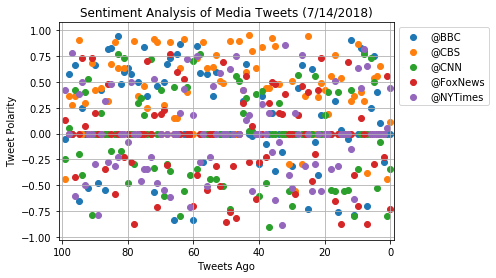

In [10]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (7/14/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [8]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.141225
@CBS        0.348781
@CNN       -0.021642
@FoxNews   -0.035969
@NYTimes    0.009297
Name: Compound, dtype: float64

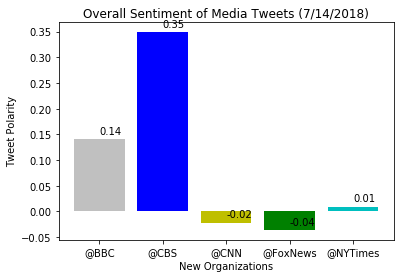

In [11]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])

plt.title("Overall Sentiment of Media Tweets (7/14/2018)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()